# Nadaraya-Watson Kernel Regression

## Load Data

In [1]:
import math
import numpy as np
from sklearn.datasets import load_boston

In [2]:
X = load_boston().data[:, 12]
y = load_boston().target

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

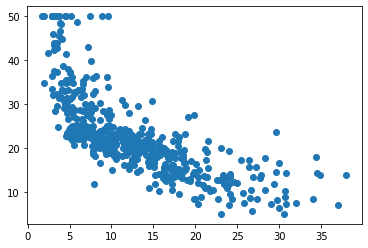

In [5]:
fig, ax = plt.subplots()
ax.scatter(X, y)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

---

## My Nadaraya-Watson Kernel Regression

In [7]:
class MyNWKernelRegression:
    def __init__(self, kernel='Epanechnikov', width=10):
        self.kernel = kernel
        self.width = width
        
    def epanechnikov(self, x):
        return np.where(abs(x) <= 1, 0.75*(1-x**2), 0)
    
    def tricube(self, x):
        return np.where(abs(x) <= 1, (1-abs(x)**3)**3, 0)
    
    def gaussian(self, x):
        return 1/np.sqrt(2*math.pi)*np.exp(-0.5*(x**2))
    
    def uniform(self, x):
        return np.where(abs(x) <= 1, 0.5, 0)
    
    def predict(self, X_train, y_train, X_test):
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        X_test = np.array(X_test)
        y_pred = np.array([])
        for i in range(len(X_test)):
            if self.kernel == 'KNN':
                t = abs(X_train-X_test[i])/abs(X_train-X_test[i])[np.argsort(abs(X_train-X_test[i]))==self.width][0]
                d = self.uniform(t)
            else:
                t = abs(X_train-X_test[i])/self.width
                if self.kernel == 'Epanechnikov':
                    d = self.epanechnikov(t)
                elif self.kernel == 'Tri-Cube':
                    d = self.tricube(t)
                else:
                    d = self.gaussian(t)
            y_pred = np.append(y_pred, np.sum(d*y_train)/np.sum(d))
        return y_pred

In [8]:
model1 = MyNWKernelRegression(kernel='Epanechnikov', width=2)

In [9]:
y_pred1 = model1.predict(X_train, y_train, X_test)

In [10]:
from sklearn.metrics import mean_squared_error as mse

In [11]:
print('MSE of My NWKernelRegression with Epanechnikov Kernel:', mse(y_test, y_pred1))

MSE of My NWKernelRegression with Epanechnikov Kernel: 30.57444325794635


In [12]:
model2 = MyNWKernelRegression(kernel='Tri-Cube', width=2)

In [13]:
y_pred2 = model2.predict(X_train, y_train, X_test)

In [14]:
print('MSE of My NWKernelRegression with Tri-Cube Kernel:', mse(y_test, y_pred2))

MSE of My NWKernelRegression with Tri-Cube Kernel: 30.55827224787149


In [15]:
model3 = MyNWKernelRegression(kernel='Gaussian', width=2)

In [16]:
y_pred3 = model3.predict(X_train, y_train, X_test)

In [17]:
print('MSE of My NWKernelRegression with Gaussian Kernel:', mse(y_test, y_pred3))

MSE of My NWKernelRegression with Gaussian Kernel: 32.74660335004563


In [18]:
model4 = MyNWKernelRegression(kernel='KNN', width=20)

In [19]:
y_pred4 = model4.predict(X_train, y_train, X_test)

In [20]:
print('MSE of My NWKernelRegression with KNN Kernel:', mse(y_test, y_pred4))

MSE of My NWKernelRegression with KNN Kernel: 34.67717658450976


---

## Compare to Scikit-Learn

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [22]:
model = LinearRegression()

In [23]:
X_train = X_train.reshape(-1, 1)

In [24]:
model.fit(PolynomialFeatures(degree=2).fit_transform(X_train), y_train)

LinearRegression()

In [25]:
X_test = X_test.reshape(-1, 1)

In [26]:
y_pred = model.predict(PolynomialFeatures(degree=2).fit_transform(X_test))

In [27]:
print('MSE of sklearn PolynomialRegression:', mse(y_test, y_pred))

MSE of sklearn PolynomialRegression: 33.60239474228597
